
# BE Meteo 
## HERVIOU, SOURDEVAL, MANCIET, DUC-MARTIN, LEFAUCONNIER

In [50]:
# On load les données grâce à un fichier txt qui contient le chemin vers le fichier csv contenant les données
path_data <- paste(readLines("path.txt"), collapse = "\n")

In [51]:
#install.packages("data.table")
library(data.table)
dataset_meteo <- fread(path_data)
head(dataset_meteo)

ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,⋯,Altitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code),mois_de_l_annee
<int>,<dttm>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>
7690,2017-04-05 09:00:00,101580,100,2,90,1.3,289.95,285.25,74,⋯,2,Nice,06088,Métropole Nice Côte d'Azur,200030195,Alpes-Maritimes,06,Provence-Alpes-Côte d'Azur,93,4
61998,2017-04-05 09:00:00,102720,-200,8,320,20.1,285.65,281.95,78,⋯,29,,,,NA,,,,NA,4
78925,2018-04-04 03:00:00,101420,60,1,100,3.6,298.45,295.15,82,⋯,3,Le Lamentin,97213,CA du Centre de la Martinique,249720061,Martinique,972,Martinique,2,4
61998,2018-04-05 03:00:00,101190,40,1,290,5.1,278.15,272.75,68,⋯,29,,,,NA,,,,NA,4
7690,2018-04-05 06:00:00,101240,-20,5,320,1.6,284.25,280.15,76,⋯,2,Nice,06088,Métropole Nice Côte d'Azur,200030195,Alpes-Maritimes,06,Provence-Alpes-Côte d'Azur,93,4
7149,2018-04-08 03:00:00,100730,-20,5,30,2.3,285.55,283.25,86,⋯,89,Athis-Mons,91027,Métropole du Grand Paris,200054781,Essonne,91,Île-de-France,11,4


# 1 - Description des données

### 1.1 - Organisation des données par ordre chronologique

In [ ]:
df_meteo <- data.frame(dataset_meteo)
df_meteo <- df_meteo[order(df_meteo$Date), ] # Trier les valeurs par ordre chronologique
head(df_meteo)

### 1.2 - Description des paramètres

In [ ]:
cat("Nombre de lignes de données :", nrow(df_meteo), "\n")
cat("Nombre de paramètres :", ncol(df_meteo), "\n")
cat("\tdont 14 paramètres décrivant l'emplacement de la station météo\n")
cat("\tdont 19 paramètres relatifs aux nuages/à la nébulosité (+ 4 hauteurs de bases)\n")
cat("\tdont 14 paramètres relatifs à la température\n")
cat("\tdont 7 paramètres relatifs à la pression/barométrie\n")
cat("\tdont 5 paramètres relatifs au vent/rafales\n")
cat("\tdont 5 paramètres relatifs à la pluie (précipitations)\n")
cat("\tdont 3 paramètres relatifs à la neige\n")
cat("\tdont 2 paramètres relatifs à l'humidité/rosée\n")
cat("\t + Date, mois_de_l_annee, Visibilité.horizontale, Temps.présent, Temps.passé.1, Temps.passé.2, Géopotentiel, Etat.du.sol, Phénomène.spécial.1, Phénomène.spécial.2, Phénomène.spécial.3, Phénomène.spécial.4, Temps.passé.1.1, Temps.présent.1")

### 1.3 - Description des stations météo

In [ ]:
# Caractéristiques des stations météo
df_stations <- df_meteo[c('ID.OMM.station', 'Coordonnees', 'Nom', 'Latitude', 'Longitude', 'Altitude', 'communes..name.', 'communes..code.', 'EPCI..name.', 'EPCI..code.', 'department..name.', 'department..code.', 'region..name.', 'region..code.')]
df_unique_stations <- df_stations[!duplicated(df_stations[c('ID.OMM.station')]), ]
cat("Nombre de stations météo :", nrow(df_unique_stations))
head(df_unique_stations[order(df_unique_stations$Nom), ])

### 1.4 - Carte des stations météo

In [ ]:
#install.packages(c("ggplot2", "maps", "ggmap"))
library(ggplot2)
library(maps)
library(ggmap)

options(repr.plot.width = 20, repr.plot.height = 10)

data_points <- data.frame(
  lon = df_unique_stations$Longitude,
  lat = df_unique_stations$Latitude,
  Ville = df_unique_stations$Nom
)

world <- map_data("world")

ggplot() +
  geom_polygon(data = world, aes(x = long, y = lat, group = group),
               fill = "lightgray", color = "white") +
  geom_point(data = data_points, aes(x = lon, y = lat, color = Ville), size = 1) +
  theme_minimal() +
  theme(legend.position = "none") +
  ggtitle("Carte des stations météo")


# Zoom sur l'hexagone  
data_points_metropole <- data_points[(data_points$lat<=52)&(data_points$lat>=42)&(data_points$lon<=10)&(data_points$lon>=-10),]
france <- map_data("france")

ggplot() +
  geom_polygon(data = france, aes(x = long, y = lat, group = group),
               fill = "lightgray", color = "white") +
  geom_point(data = data_points_metropole, aes(x = lon, y = lat, color = Ville), size = 3) +
  theme_minimal() +
  # theme(legend.position = "none") +
  coord_fixed(ratio = 1.2)+
  ggtitle("Carte des stations météo de France métropolitaine")

### 1.5 - Relevé de températures par station

In [ ]:
par(bg='white')
for (ville in unique(df_meteo$Nom)[1:3]){
  plot(
    df_meteo$Date[df_meteo$Nom==ville],
    df_meteo$`Température`[df_meteo$Nom==ville],
    xlab = "Date",
    ylab = "Température",
    main = ville,
    type = "l",
)}

### 1.6 - Valeurs moyennes des grandeurs mesurées par station

In [ ]:
# install.packages("dplyr")
library(dplyr)

df_grouped <- df_meteo %>%
  group_by(ID.OMM.station) %>%
  summarise(n_mesures = n(),
            T_mean = mean(`Température`,na.rm = TRUE),
            T_min = min(`Température`,na.rm = TRUE),
            T_max = max(`Température`,na.rm = TRUE),
            P_mean = mean(Pression.au.niveau.mer,na.rm = TRUE),
            nebulosite_mean = mean(Nebulosité.totale, na.rm = TRUE)
            )

head(df_grouped)

### 1.7 - Carte des températures extrêmes mesurées par station

In [ ]:
df_station_stats <- merge(x = df_unique_stations, y = df_grouped, by = "ID.OMM.station", all = TRUE)

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)

world <- map_data("world")

ggplot() +
  geom_polygon(data = world, aes(x = long, y = lat, group = group),
               fill = "lightgray", color = "white") +
  geom_point(data = df_station_stats, aes(x = Longitude, y = Latitude, color = T_min), size = 1) +
  theme_minimal() +
  # theme(legend.position = "none")+
  ggtitle("Température minimale par station (K)")

ggplot() +
  geom_polygon(data = world, aes(x = long, y = lat, group = group),
               fill = "lightgray", color = "white") +
  geom_point(data = df_station_stats, aes(x = Longitude, y = Latitude, color = T_max), size = 1) +
  theme_minimal() +
  # theme(legend.position = "none")+
  ggtitle("Température maximale par station (K)")

In [ ]:
summary(dataset_meteo)

# 2. Un calcul et étude d'estimateur

Nous allons étudier 3 estimateurs sur le jeu de donnée météo :

### 2.1 - $\small\textbf{Estimateur 1 : }$

Etude d'un estimateur de la température moyenne sur l'hiver 2019 en France métropolitaine.

In [ ]:
#On extrait les données utiles du dataset
data_points <- data.frame(
  date = df_meteo$Date,
  temp = df_meteo$`Température...C.`,
  station = df_meteo$Nom,
  mois = df_meteo$mois_de_l_annee,
  lat = df_meteo$Latitude,
  long = df_meteo$Longitude
)

france <- map_data("france")

#on filtre le dataset pour avoir les données voulues et calculer la moyenne de température
data_points_metropole <- data_points %>%
  filter(lat <= 52, lat >= 42,
         long <= 10, long >= -10,
         date < "2020-01-01", date > "2019-01-01",
         mois > 1, mois < 4) %>%
  group_by(station, lat, long) %>%
  summarise(temp_moy = mean(temp, na.rm = TRUE), .groups = "drop")

#plot de la carte obtenue
ggplot() +
  geom_polygon(data = france, aes(x = long, y = lat, group = group),
               fill = "lightgray", color = "white") +
  geom_point(data = data_points_metropole, aes(x = long, y = lat, color = temp_moy), size = 3) +
  theme_minimal() +
  scale_color_gradient(low = "blue", high = "red",
                     name = "Température moyenne (°C)") +
  coord_fixed(ratio = 1.2)+
  ggtitle("Moyenne des température sur l'hiver 2019")


Grâce à cette carte, nous pouvons voir la répartition spatiale de la température moyenne de l'hiver 2019. Nous observons que les zones géographiques au Sud sont plus chaudes que celles au Nord Est. Nous pouvons donc observer un gradient de température du Sud vers le Nord ce qui correspond empiriquement à l'idée que nous avons de la météo.

In [ ]:
library(dplyr)
library(lubridate)
library(ggplot2)

#On extrait les données utiles du dataset
data_points <- data.frame(
  date = df_meteo$Date,
  temp = df_meteo$`Température...C.`,
  station = df_meteo$Nom,
  mois = df_meteo$mois_de_l_annee,
  lat = df_meteo$Latitude,
  long = df_meteo$Longitude
)

# Paramètre : niveau de confiance
alpha <- 0.05  # pour IC à 95%

# Calculer par année : moyenne, sd, n et IC
ic_par_annee <- data_points %>%
  filter(lat <= 52, lat >= 42,
         long <= 10, long >= -10,
         date < "2020-01-01", date > "2019-01-01",
         mois > 1, mois < 4) %>%
  group_by(station, lat, long) %>%
  summarise(
    n = sum(!is.na(temp)),
    temp_moy = mean(temp, na.rm = TRUE),
    sd_temp = sd(temp, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  filter(n > 1) %>%
  mutate(
    se = sd_temp / sqrt(n),    # erreur standard
    ic_bas = temp_moy - sqrt(se / (alpha * n)),
    ic_haut = temp_moy + sqrt(se / (alpha * n))
  )


# Graphe avec barres d'erreur
ggplot(ic_par_annee, aes(x = station, y = temp_moy)) +
  geom_line() +
  geom_point(size = 2) +
  geom_errorbar(aes(ymin = ic_bas, ymax = ic_haut), width = 0.2) +
  labs(
    title = paste0("Température moyenne annuelle et Intervalle de Confiance à ", 100*(1-alpha), "%"),
    x = "Station",
    y = "Température moyenne (°C)"
  ) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) 


L'estimateur de la moyenne est un estimateur sans biais par construction. Nous avons donc calculé l'intervalle de confiance à 95% de cet estimateur pour chacune des stations qui dépend de l'estimateur de la variance. Nous observons un intervalle de confiance qui est plutôt précis par rapport à la valeur absolue de la moyenne. Ceci est dû au fait que nous avons beaucoup de données et donc l'intervalle de confiance est réduit.

D'après la formule : 
$
IC = \left[ \; \bar{X}_n - \sqrt{\frac{\hat{\sigma}_n^2}{\alpha n}} \; , \; 
              \bar{X}_n + \sqrt{\frac{\hat{\sigma}_n^2}{\alpha n}} \; \right]
$

### 2.2 - $\small\textbf{Estimateur 2 : }$

Nous allons faire de même avec une estimation des précipitations moyennes en France métropolitaine sur l'hiver 2019.

In [ ]:
#On extrait les données utiles du dataset
data_points <- data.frame(
  date = df_meteo$Date,
  pluie = df_meteo$`Précipitations.dans.la.dernière.heure`,
  station = df_meteo$Nom,
  mois = df_meteo$mois_de_l_annee,
  lat = df_meteo$Latitude,
  long = df_meteo$Longitude
)

france <- map_data("france")

#on filtre le dataset pour avoir les données voulues et calculer la moyenne de température
data_points_metropole <- data_points %>%
  filter(lat <= 52, lat >= 42,
         long <= 10, long >= -10,
         date < "2020-01-01", date > "2019-01-01",
         mois > 1, mois < 4) %>%
  group_by(station, lat, long) %>%
  summarise(pluie_moy = mean(pluie, na.rm = TRUE), .groups = "drop")

#plot de la carte obtenue
ggplot() +
  geom_polygon(data = france, aes(x = long, y = lat, group = group),
               fill = "lightgray", color = "white") +
  geom_point(data = data_points_metropole, aes(x = long, y = lat, color = pluie_moy), size = 3) +
  theme_minimal() +
  scale_color_gradient(low = "blue", high = "red",
                     name = "Précipitation (mm)") +
  coord_fixed(ratio = 1.2)+
  ggtitle("Moyenne des précipitations sur l'hiver 2019")


Grâce à cette carte et à l'estimation des précipitations, nous pouvons observer les régions où il a le plus plu durant l'hiver 2019. Nous observons que la Bretagne est une région où il a particulièrement plu durant cet hiver ce qui confirme aussi la croyance populaire...

In [ ]:
library(dplyr)
library(lubridate)
library(ggplot2)

#On extrait les données utiles du dataset
data_points <- data.frame(
  date = df_meteo$Date,
  pluie = df_meteo$`Précipitations.dans.la.dernière.heure`,
  station = df_meteo$Nom,
  mois = df_meteo$mois_de_l_annee,
  lat = df_meteo$Latitude,
  long = df_meteo$Longitude
)

# Paramètre : niveau de confiance
alpha <- 0.05  # pour IC à 95%

# Calculer par année : moyenne, sd, n et IC
ic_par_annee <- data_points %>%
  filter(lat <= 52, lat >= 42,
         long <= 10, long >= -10,
         date < "2020-01-01", date > "2019-01-01",
         mois > 1, mois < 4) %>%
  group_by(station, lat, long) %>%
  summarise(
    n = sum(!is.na(pluie)),
    pluie_moy = mean(pluie, na.rm = TRUE),
    sd_pluie = sd(pluie, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  filter(n > 1) %>%
  mutate(
    se = sd_pluie / sqrt(n),    # erreur standard
    ic_bas = pluie_moy - sqrt(se / (alpha * n)),
    ic_haut = pluie_moy + sqrt(se / (alpha * n))
  )


# Graphe avec barres d'erreur
ggplot(ic_par_annee, aes(x = station, y = pluie_moy)) +
  geom_line() +
  geom_point(size = 2) +
  geom_errorbar(aes(ymin = ic_bas, ymax = ic_haut), width = 0.2) +
  labs(
    title = paste0("Précipations moyennes annuelles et Intervalle de Confiance à ", 100*(1-alpha), "%"),
    x = "Station",
    y = "Précipitation moyenne (°C)"
  ) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) 


Nous avons aussi tracé l'intervalle de confiance pour l'estimateur de la précipitation moyenne. Nous observons une plus grande disparité dans les données de par leur variance plus grande et leur plus faible nombre par rapport à la température vu plus tôt. Nous pouvons donc en déduire que l'estimateur de la précipitation moyenne est plus suceptible d'être moins précis que celui de la température.

### 2.3 - $\small\textbf{Estimateur 3 : }$

Nous allons finir par estimer la température moyenne en France métropolitaine sur une année.

In [ ]:
#On extrait les données utiles du dataset
data_points <- data.frame(
  date = df_meteo$Date,
  temp = df_meteo$`Température...C.`,
  lat = df_meteo$Latitude,
  long = df_meteo$Longitude
)

#on filtre le dataset pour avoir les données voulues et calculer la moyenne de température
data_points <- data_points%>%
  mutate(annee = year(date))
data_points <- data_points %>%
  group_by(annee) %>%
  summarise(temp_moy = mean(temp, na.rm = TRUE), .groups = "drop")

#plot du graphe obtenu
ggplot(data_points, aes(x = annee, y = temp_moy)) +
  geom_line(color = "blue", size = 1) +
  geom_point(color = "red", size = 2) +
  labs(
    title = "Évolution de la température moyenne annuelle",
    x = "Année",
    y = "Température moyenne (°C)"
  ) +
  theme_minimal()

Grâce à ce graphe nous étudions l'évolution de la température moyenne annuelle de 2015 à 2025. Nous observons une tendance croissante de cette température moyenne annuelle. Nous confirmons donc un des effets du réchauffement climatique :  l'augmentation de la température en France métropolitaine depuis 10 ans. 

In [ ]:
library(dplyr)
library(lubridate)
library(ggplot2)

# Paramètre : niveau de confiance
alpha <- 0.05  # pour IC à 95%

#On extrait les données utiles du dataset
data_points <- data.frame(
  date = df_meteo$Date,
  temp = df_meteo$`Température...C.`,
  lat = df_meteo$Latitude,
  long = df_meteo$Longitude
)

# Calculer par année : moyenne, sd, n et IC t
ic_par_annee <- data_points %>%
  mutate(annee = year(date)) %>%
  group_by(annee) %>%
  summarise(
    n = sum(!is.na(temp)),
    temp_moy = mean(temp, na.rm = TRUE),
    sd_temp = sd(temp, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  mutate(
    se = sd_temp / sqrt(n),
    ic_bas = temp_moy - sqrt(se / (alpha * n)),
    ic_haut = temp_moy + sqrt(se / (alpha * n))
  )

# Graphe avec barres d'erreur
ggplot(ic_par_annee, aes(x = annee, y = temp_moy)) +
  geom_line() +
  geom_point(size = 2) +
  geom_errorbar(aes(ymin = ic_bas, ymax = ic_haut), width = 0.2) +
  labs(
    title = paste0("Température moyenne annuelle et IC (", 100*(1-alpha), "%)"),
    x = "Année",
    y = "Température moyenne (°C)"
  ) +
  theme_minimal()

Nous avons retracé le même graphe qu'au dessus en ajoutant les intervalles de confiance. Dû au grand nombre de données sur l'année, nous avons un intervalle de confiance très petit. Nous sommes donc ici sur un estimateur très précis.

# 3. Des tests statistiques (au moins un sur un paramètre et une ANOVA)

In [89]:
#On extrait les données (colonnes) utiles du dataset 'météo' et on en fait un dataframe

# colnames(dataset_meteo)

data_points <- data.frame(
  date = dataset_meteo$Date,
  station = dataset_meteo$Nom,
  lat = dataset_meteo$Latitude,
  long = dataset_meteo$Longitude,
  temp = dataset_meteo$'Température (°C)',
  humidity = dataset_meteo$Humidité,
  precipitations1h = dataset_meteo$'Précipitations dans la dernière heure',
  region_code = dataset_meteo$'region (code)',
  region_name = dataset_meteo$'region (name)'
)

In [90]:
# df sur l'année 2020
df_2020 <- data_points[format(data_points$date, "%Y") == "2020", ]

# df sur l'année 2024
df_2024 <- data_points[format(data_points$date, "%Y") == "2024", ]

### 3.1 - Intervalle de confiance de la moyenne de température en France en 2020

In [128]:
cat("température moyenne sur 2020 =", mean(df_2020$temp, na.rm = TRUE), "°C", "\n")

température moyenne sur 2020 = 15.65145 °C 


La température moyenne en France en 2020 était de 15.65 °C d'après les données récoltées. Mais quelle est la moyenne réelle de la température en 2020 avec un intervalle de confiance à 95 % ?

Pour le savoir, on réalise un test de la moyenne, avec comme statistique de test :

$ T = \frac{\bar{X_n} - \mu}{S / \sqrt{n}} $ qui suit une loi de Student à n-1 ddl (on ne connait pas la variance)

In [129]:
res <- t.test(df_2020$temp, conf.level = 0.95)
print(res)


	One Sample t-test

data:  df_2020$temp
t = 709.79, df = 170880, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 15.60824 15.69467
sample estimates:
mean of x 
 15.65145 



D'après les résultats, on dispose ici de 170 880 ddl et le test nous donne une intervalle de confiance à 95%   
$ I_C = [15.60°C, 15.69°C]$ pour la moyenne de la température.  
Donc on peux raisonnablement se dire que la température en France en 2020 était entre 15.6°C et 15.7°C (mais pas forcément exactement 15.65°C comme indiqué par la moyenne).

### 3.2 - Test d'égalité des moyennes de température annuelles (2020 vs 2024)

On s'intéresse ici à la température sur le territoire français sur 2 années distinctes : en 2020 et en 2024.  
Pour confirmer la tendance du réchauffement climatique, on va essayer de confirmer statistiquement l'augmentation de la température moyenne entre 2020 et 2024.

température moyenne sur 2020 = 15.65145 °C 
température moyenne sur 2024 = 15.6994 °C 


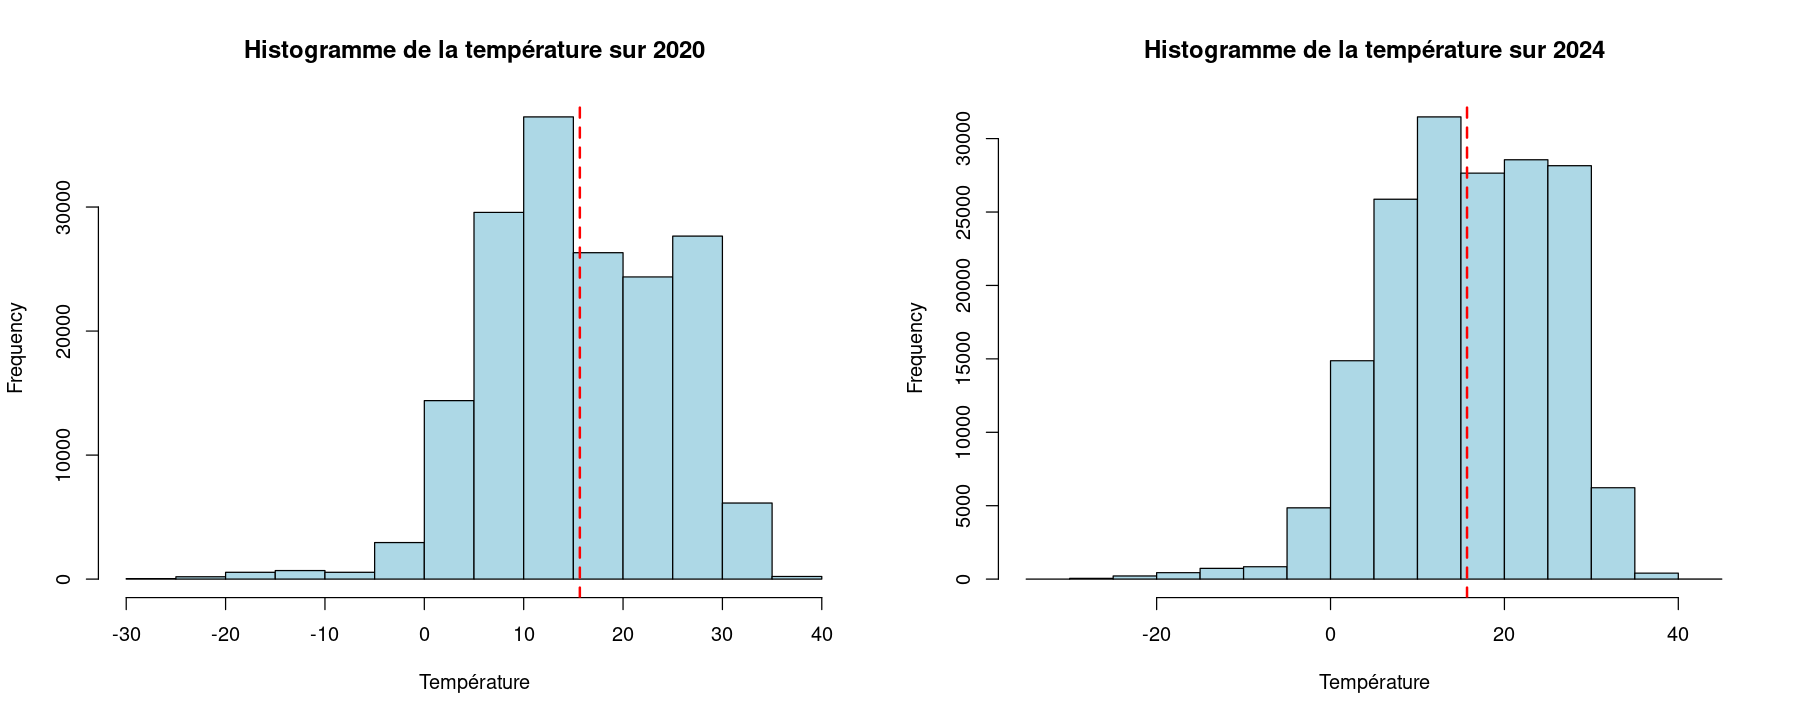

In [91]:
par(bg = "white") # graphique à fond blanc
par(mfrow = c(1, 2))  # 4 graphiques côte à côte

hist(df_2020$temp,
     main = "Histogramme de la température sur 2020",
     xlab = "Température",
     col = "lightblue",
     border = "black")
abline(v = mean(df_2020$temp, na.rm = TRUE), col = "red", lwd = 2, lty = 2)

hist(df_2021$temp,
     main = "Histogramme de la température sur 2024",
     xlab = "Température",
     col = "lightblue",
     border = "black")
abline(v = mean(df_2024$temp, na.rm = TRUE), col = "red", lwd = 2, lty = 2)

cat("température moyenne sur 2020 =", mean(df_2020$temp, na.rm = TRUE), "°C", "\n")
cat("température moyenne sur 2024 =", mean(df_2024$temp, na.rm = TRUE), "°C", "\n")

On observe des histogrammes de température globalement similaires sur les deux années mais avec une moyenne de température légèrement supérieure en 2024 : 15.65 °C en 2020 contre 15.70 °C en 2024.  
Bien que les moyennes soient différentes, on va voir si elles sont **significativement** différentes grâce à un test statistique.

On suppose que la température suit une loi normale : c'est une bonne hypothèse puisque la température que l'on a dans notre dataframe est une valeur moyenne de température sur un intervalle de temps. On remarque également la forme de l'histogramme qui est caractéristique d'un celle d'un variable aléatoire suivant une loi normale. On suppose également les mesures de température comme iid.  

On réalise donc maintenant un test statistique d'égalité des moyennes, avec la statistique de test :

$ T = \frac{\bar{X} - \bar{Y}}{\sqrt{\tfrac{s_X^2}{n_1} + \tfrac{s_Y^2}{n_2}}} $ qui suit une loi de Student (attention : on ne connaît à priori pas les variances) 
 
avec les hypothèses :  
$ H_0 : \mu_1 = \mu_2 \qquad \text{vs} \qquad H_1 : \mu_1 \neq \mu_2 $


In [104]:
res <- t.test(df_2020$temp, df_2024$temp,
       alternative = "two.sided",   # test si 2024 = 2020
       var.equal = FALSE)

print(res)


	Welch Two Sample t-test

data:  df_2020$temp and df_2024$temp
t = -1.5242, df = 342118, p-value = 0.1275
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1096005  0.0137096
sample estimates:
mean of x mean of y 
 15.65145  15.69940 



On obtient une statistique $ T = -1.52 $ (cohérent car la température moyenne en 2020 était inférieure à celle en 2024), avec une $ p_{value} = 0.13 $.  
On a $ p_{value} > 0.05 $, donc avec un intervalle de confiance à 95% on ne peux pas rejetter $ H_0 $ !  
Même si la moyenne brute est légèrement plus haute en 2024, la variation naturelle des températures fait que cette différence n’est pas statistiquement significative, donc on ne peux pas conclure que la moyenne de température en 2024 soit supérieure de celle de 2020. 

### 3.3 - Etude des différences entre les régions françaises (ANOVA)

In [107]:
# affichage du numéro des régions

unique_regions <- unique(df_2020[, c("region_code", "region_name")])
unique_regions <- unique_regions[order(unique_regions$region_code), ]
# unique_regions

On s'intéresse maintenant à la température en 2020 de différentes régions françaises :  
- Guadeloupe (code région 1)
- Bretagne (code région 53)
- Nouvelle-Aquitaine (code région 75)
- Occitanie (code région 76)

moyenne température Guadeloupe sur 2020 = 27.01542 °C 
moyenne température Bretagne sur 2020 = 12.97848 °C 
moyenne température Nouvelle-Aquitaine sur 2020 = 14.02076 °C 
moyenne température Occitanie sur 2020 = 14.28605 °C 


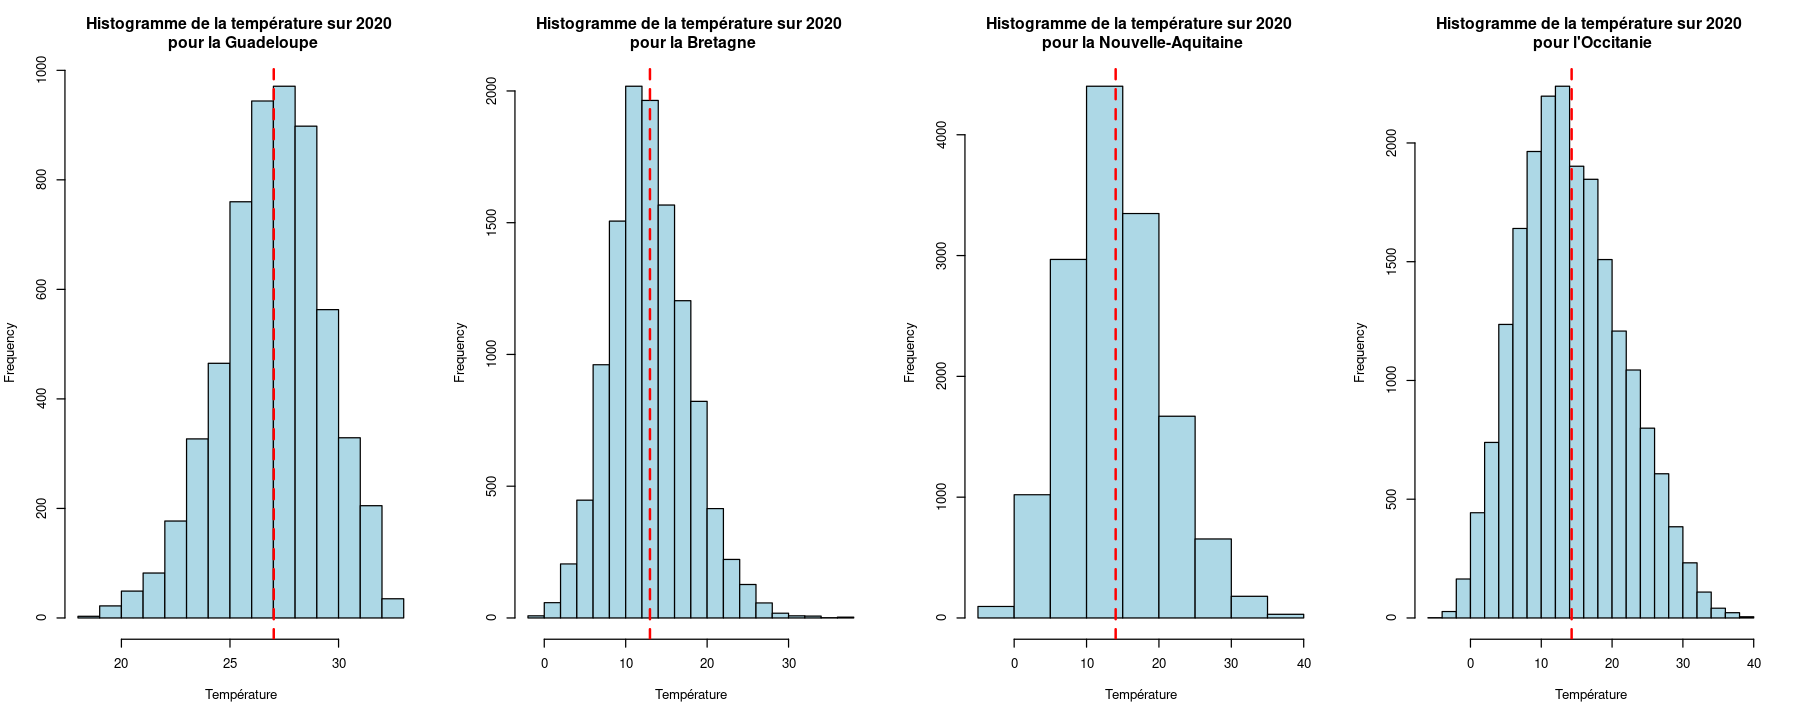

In [95]:
par(bg = "white") # graphique à fond blanc
par(mfrow = c(1, 4))  # 4 graphiques côte à côte

df_2020_1 = subset(df_2020, region_code == 1)
df_2020_53 = subset(df_2020, region_code == 53)
df_2020_75 = subset(df_2020, region_code == 75)
df_2020_76 = subset(df_2020, region_code == 76)

hist(df_2020_1$temp,
     main = "Histogramme de la température sur 2020 \n pour la Guadeloupe",
     xlab = "Température",
     col = "lightblue",
     border = "black")
abline(v = mean(df_2020_1$temp, na.rm = TRUE), col = "red", lwd = 2, lty = 2)

hist(df_2020_53$temp,
     main = "Histogramme de la température sur 2020 \n pour la Bretagne",
     xlab = "Température",
     col = "lightblue",
     border = "black")
abline(v = mean(df_2020_53$temp, na.rm = TRUE), col = "red", lwd = 2, lty = 2)

hist(df_2020_75$temp,
     main = "Histogramme de la température sur 2020 \n pour la Nouvelle-Aquitaine",
     xlab = "Température",
     col = "lightblue",
     border = "black")
abline(v = mean(df_2020_75$temp, na.rm = TRUE), col = "red", lwd = 2, lty = 2)

hist(df_2020_76$temp,
     main = "Histogramme de la température sur 2020 \n pour l'Occitanie",
     xlab = "Température",
     col = "lightblue",
     border = "black")
abline(v = mean(df_2020_76$temp, na.rm = TRUE), col = "red", lwd = 2, lty = 2)

cat("moyenne température Guadeloupe sur 2020 =", mean(df_2020_1$temp, na.rm = TRUE), "°C", "\n")
cat("moyenne température Bretagne sur 2020 =", mean(df_2020_53$temp, na.rm = TRUE), "°C", "\n")
cat("moyenne température Nouvelle-Aquitaine sur 2020 =", mean(df_2020_75$temp, na.rm = TRUE), "°C", "\n")
cat("moyenne température Occitanie sur 2020 =", mean(df_2020_76$temp, na.rm = TRUE), "°C", "\n")

Comme précédemment, on remarque que la température semble suivre une loi normale pour chacune des régions. C'est donc une encore bonne hypothèse que de considérer que la température suit une loi normale.  
De plus, on remarque des moyennes significativement différentes entre les régions.

On rajoute à notre études les variables et d'humidité et de précipitations (sur la dernière heure).  
PS : on pourrait réaliser le même type d'histogramme pour ces variables.

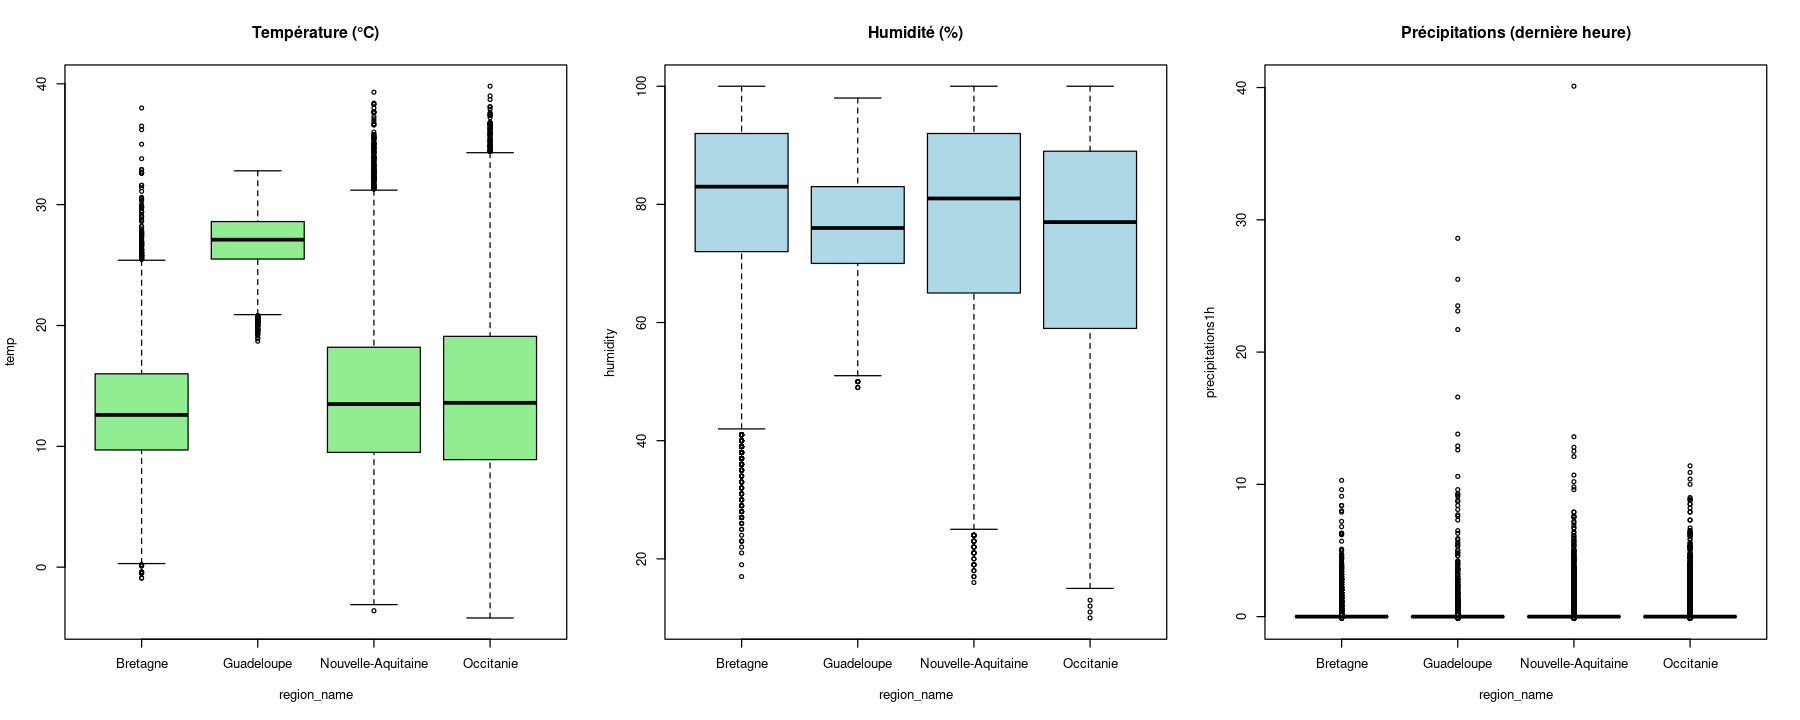

In [ ]:
par(bg = "white") # graphique à fond blanc
par(mfrow = c(1, 3))  # 3 graphiques côte à côte

options(repr.plot.width = 15, repr.plot.height = 6) # réglages taille affichage

df_2020_4 <- subset(df_2020, region_code %in% c(1, 53, 75, 76))

boxplot(temp ~ region_name, data = df_2020_4, main = "Température (°C)", col = "lightgreen")
boxplot(humidity ~ region_name, data = df_2020_4, main = "Humidité (%)", col = "lightblue")
boxplot(precipitations1h ~ region_name, data = df_2020_4, main = "Précipitations (dernière heure)", col = "lightpink")


Grâce aux boxplot, On voir clairement pour la température que la moyenne est très clairement différentes, mais c'est moins clair pour les niveaux d'humidité et de précipitations. 

On va donc réaliser un test ANOVA pour chacune des variables :  
on dispose de 4 groupes dinstincts (région Bretagne, Guadeloupe, Nouvelle-Aquitaine et Occitanie), et on va tester si ces 4 groupes ont la même moyenne pour les différentes variables (Température, Humidité et Précipitations).  

On suppose pour cela que les variables aléatoires de température, humidité et précipitation suivent une loi normale (ce qui est une bonne hypothèse comme on l'a vu précédemment), et que les mesures sont indépendantes.  

On s'interesse alors à la statistique de test :
$ F = \frac{SCE}{SCR} $ qui suit une loi de Fisher.  
avec les hypothèses :  
$ H_0 : \mu_1 = \mu_2 = \mu_3 = ... \qquad \text{vs} \qquad H_1 : \text{une des moyenne est différente} $

In [113]:
cat("ANOVA Température\n")
aov_temp <- aov(temp ~ region_name, data = df_2020_4)
summary(aov_temp)

ANOVA Température


               Df  Sum Sq Mean Sq F value Pr(>F)    
region_name     3  907127  302376    7892 <2e-16 ***
Residuals   52169 1998851      38                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
46 observations deleted due to missingness

Pour la **température**, la statistique de test $F = 7892$ est très élevée.  
On a $\text{p}_\text{value} < 2e-16$ : c'est extrêment petit donc on rejette $ H_0 $.
On en conclut qu'il y a une différence significative de température entre les régions (à minima entre deux régions).

In [115]:
cat("ANOVA Humidité\n")
aov_humidity <- aov(humidity ~ region_name, data = df_2020_4)
summary(aov_humidity)

ANOVA Humidité


               Df   Sum Sq Mean Sq F value Pr(>F)    
region_name     3   380723  126908   446.6 <2e-16 ***
Residuals   52119 14810176     284                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
96 observations deleted due to missingness

Pour l'**humidité**, la statistique de test $F = 446$ est encore élevée.  
On a $\text{p}_\text{value} < 2e-16$ : c'est extrêment petit donc on rejette $ H_0 $.
On en conclut également qu'il y a une différence significative d'humidité entre les régions (à minima entre deux régions).

In [ ]:
cat("ANOVA Précipitations\n")
aov_precipitations1h <- aov(precipitations1h ~ region_name, data = df_2020_4)
summary(aov_precipitations1h)

ANOVA Précipitation


               Df Sum Sq Mean Sq F value   Pr(>F)    
region_name     3     13   4.184   11.16 2.57e-07 ***
Residuals   51342  19248   0.375                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
873 observations deleted due to missingness

Pour les **précipitations**, la statistique de test $F = 11$ est moins importante mais elle reste rélativement grande.  
On a maintenant $\text{p}_\text{value} = 2.5e-07$ : donc cela nous permet encore une fois de rejetter $ H_0 $ avec un intervalle de confiance à 99.9 % au moins.
On en conclut de nouveaux qu'il y a une différence significative de précipitation entre les régions.

# 4. Une régression et étude de corrélation

### Régression
On s'intéresse aux valeurs de pression mesurées au niveau de la mer et au niveau de la station.

On s'attend en effectuant des régressions linéaires à retrouver un modèle similaire au modèle physique de pression (statique des fluides).

$P(h) = P_{h=0} + \rho * g * h$

- $\rho$ masse volumique air en $kg/m^3$
- $g$ accélération de la pesanteur $9.81m/s²$
- $h$ hauteur en $m$

In [ ]:
n_graph_max <- 5

df_regression_results = data.frame(matrix(ncol = 4, nrow = 0))
col_names <- c("Nom","(Intercept)","Pression.au.niveau.mer", "R2")
names(df_regression_results) <- col_names

i <- 0
for (station in sort(df_station_stats$Nom)){
    if (station!='EMBRUN' & station!="LE PUY-LOUDES"){
        df_meteo_station <- df_meteo[df_meteo$Nom==station, c('ID.OMM.station', 'Date', 'Pression.au.niveau.mer', 'Variation.de.pression.en.24.heures', 'Variation.de.pression.en.3.heures', 'Précipitations.dans.la.dernière.heure', 'Précipitations.dans.les.3.dernières.heures', 'Précipitations.dans.les.24.dernières.heures', 'Type.de.tendance.barométrique', 'Point.de.rosée', 'Humidité', 'Pression.station', 'Niveau.barométrique','Altitude')]
        model_pression <- lm(Pression.station ~ Pression.au.niveau.mer, data=df_meteo_station)
        # cat("R² : ",summary(model_pression)$r.squared)
        if (i<n_graph_max){
            par(bg='white')
            plot(x=df_meteo_station$Pression.au.niveau.mer, y=df_meteo_station$Pression.station, main=station)
            abline(model_pression)
            
        }
        i <- i+1

        df_station_results<-data.frame(station,model_pression$coefficients['(Intercept)'], model_pression$coefficients['Pression.au.niveau.mer'], summary(model_pression)$r.squared,row.names = station)
        names(df_station_results)<- col_names

        df_regression_results <- rbind(df_regression_results, df_station_results)}
    }

In [ ]:
df_regression_results

In [ ]:
cat("Coefficient directeur moyen des régressions linéaires :",mean(df_regression_results$Pression.au.niveau.mer))

Les régressions linéaires effectuées semblent confirmer la cohérence d'un modèle $P(h) = P_{h=0} + cste$.

Il est difficile de conclure et confirmer la modélisation en $\rho gh$ de l'intercept, la valeur de $\rho$ dépendant de la température de manière non linéaire (on a un terme qui fait intervenir à la fois l'altitude $h$ et la température $T$).

### Etude de corrélation
On remarque que les coefficients R² des régressions linéaires sont tous très proches de 1. Cela nous permet de valider la corrélation entre la pression mesurée au niveau de la station et au niveau de la mer

### ANOVA

On veut tester si les stations ont les mêmes moyennes pour les variables quantitatives telles que la vitesse du vent moyen 10min.

Une ANOVA requiert l'indépendance entre les variables aléatoires et que ces variables aléatoires suivent des lois normales de même variance. On va donc considérer la vitesse du vent moyen au pas 10min car ces moyennes font intervenir des mesures d'un unique pas de temps dans l'échantillonage des données météo (3 heures).
On fait l'hypothèse que chaque mesure sera indépendante des autres (pas de recouvrement des mesures (10min<3h), mais le fait qu'on ait une série temporelle peut remettre en cause cette supposée indépendance).

In [ ]:
par(bg='white')
boxplot(Vitesse.du.vent.moyen.10.mn ~ Nom, data = df_meteo)

In [ ]:
cat("ANOVA Vitesse du vent moyen 10min\n")
aov_vitesse_vent_10mn = aov(Vitesse.du.vent.moyen.10.mn ~ Nom, df_meteo)
print(aov_vitesse_vent_10mn)
summary(aov_vitesse_vent_10mn)

Le test statistique de l'ANOVA (test de Fisher) donne une valeur de 14044 ce qui correspond à une p-value inférieure à $2e-16$. Pour un $\alpha=0.001$, on rejette l'hypothèse $H_0$ qui dit que toutes les moyennes des mesures de vitesse de vent par groupe de station sont égales (intervalle de confiance à 99,9%).

Cela signifie que certaines stations météo ont sont exposées en moyenne (10min) un vent plus rapide que d'autres stations. En effet, on remarque déjà dans le boxplot ci-dessus que certains territoires ont des distributions de vitesse de vent assez différentes des autres (notamment pour les territoires insulaires ou du littoral tels que DUMONT D'URVILLE, CROZET, JUAN DE NOVA, KERGUELEN ou encore NOUVELLE AMSTERDAM).

# 5. Une ACP et une PLS


**Introduction :** On souhaite réaliser une analyse en composantes principales. Pour cela, on sélectionne un sous-ensemble du jeu de données météo total. 

In [ ]:
sub <- df_meteo[df_meteo$Date > "2021-01-01 00:00:00 UTC" & df_meteo$Date <= "2021-12-31 00:00:00 UTC" & df_meteo$Nom == "TOULOUSE-BLAGNAC", ]

On sélectionne toutes les données météo de la station de Mont-de-Marsan sur l'année 2021. Commençons par analyser le jeu de données sélectionné en regardant le nombre de colonnes avec des valeurs numériques et celles qui contiennent suffisamment de valeurs pour une analyse. 

In [ ]:
for (col in colnames(sub)){
    if (!is.numeric(sub[[col]])){
        sub[[col]] <- NULL
    }
    na_frac <- sum(is.na(sub[[col]])) / nrow(sub)
    if (na_frac > 0.2) {
        sub[[col]] <- NULL
    }
}

Puis, on supprimme les colonnes inintéressantes pour la suite.

In [ ]:
colonnes_a_supprimer <- c("Altitude","EPCI..code.","region..code.","mois_de_l_annee","Latitude","Longitude", "ID.OMM.station")

for (col in colonnes_a_supprimer){
    sub[[col]]<- NULL
}


**Analyse en composantes principales**

Nous souhaitons faire la PCA sur quelques variables du jeu de données précédent. Nous prenons un nombre restreint de variables autour de quelques indicateurs importants pour les prédictions météo (température, pression, humidité, point de rosée). L'objectif est de distinguer quelles variables ont le plus d'impact sur la variance des données, ainsi que des potentielles corrélations entre elles.

In [ ]:
vars_th <- c("Température","Point.de.rosée","Humidité", "Pression.station")

sub_th <- sub[, vars_th]

# Nettoyage
n_before <- nrow(sub_th)
sub_th <- na.omit(sub_th)
n_after  <- nrow(sub_th)
cat("Lignes (avant -> après) suppression NA :", n_before, "->", n_after, "\n")
if(nrow(sub_th) < 3) stop("Trop peu de lignes après nettoyage pour faire une ACP utile.")

# ACP
library(FactoMineR)
res_pca_th <- PCA(sub_th, scale.unit = TRUE, graph = FALSE)

print(res_pca_th$eig)

ind <- res_pca_th$ind$coord[, 1:2, drop = FALSE]   # coordonnées individus
var <- res_pca_th$var$coord[, 1:2, drop = FALSE]   # coordonnées variables

# ---- 1) Nuage de points + flèches ----
max_ind <- max(abs(ind))
max_var <- max(abs(var))
sc <- ifelse(max_var == 0, 1, 0.8 * max_ind / max_var)

var_len <- sqrt(var[,1]^2 + var[,2]^2)
keep_var <- var_len > 1e-8

xlim <- range(ind[,1], var[keep_var,1] * sc) * 1.1
ylim <- range(ind[,2], var[keep_var,2] * sc) * 1.1



plot(ind, pch = 19, col = "grey40", cex = 0.6,
     xlab = paste0("PC1 (", round(res_pca_th$eig[1,2], 1), "%)"),
     ylab = paste0("PC2 (", round(res_pca_th$eig[2,2], 1), "%)"),
     xlim = xlim, ylim = ylim,
     main = "Biplot : individus + variables")
abline(h = 0, v = 0, col = "grey80")

if(any(keep_var)){
  arrows(0, 0, var[keep_var,1] * sc, var[keep_var,2] * sc,
         length = 0.08, col = "red", lwd = 1.2)
  text(var[keep_var,1] * sc * 1.06, var[keep_var,2] * sc * 1.06,
       labels = rownames(var)[keep_var], col = "red", cex = 0.9)
}

theta <- seq(0, 2*pi, length = 200)
plot(cos(theta), sin(theta), type = "l", lwd = 1.5, col = "blue",
     xlab = paste0("PC1 (", round(res_pca_th$eig[1,2], 1), "%)"),
     ylab = paste0("PC2 (", round(res_pca_th$eig[2,2], 1), "%)"),
     asp = 1, main = "Cercle des corrélations")
abline(h = 0, v = 0, col = "grey80")

arrows(0, 0, var[keep_var,1], var[keep_var,2],
       length = 0.08, col = "red", lwd = 1.2)
text(var[keep_var,1] * 1.08, var[keep_var,2] * 1.08,
     labels = rownames(var)[keep_var], col = "red", cex = 0.9)


**Conclusion**

On peut distinguer deux catégories de variables : les variables qui se projettent le plus sur la première composante principale (température et point de rosée), et celles qui se projettent plus selon la seconde (humidité et pression mesurée à la station).


**Régression PLS**

On souhaite analyser quelles variables, parmi celles du jeu de données initial, seront le plus corrélées avec les précipitation dans les dernières 24h, et trouver un modèle permettant de retrouver les précipitations dans les dernières 24h à partir de nos variables. On enlève du jeu de données les variables de précipitations autres que celles dans les dernières 24H dans le but d'expliquer les précipitations par d'autres variables. 

In [ ]:
library(pls)
# install.packages("ggplot2")
library(ggplot2)


colonnes_non_desirables <- c("Type.de.tendance.barométrique","Précipitations.dans.les.12.dernières.heures","Précipitations.dans.les.3.dernières.heures", "Précipitations.dans.les.6.dernières.heures", "Précipitations.dans.la.dernière.heure")
for (col in colonnes_non_desirables){
    sub[[col]] <- NULL
}

num_cols <- sapply(sub, is.numeric)

Y_col <- "Précipitations.dans.les.24.dernières.heures"
if(!Y_col %in% colnames(sub)) stop("La colonne précipitations n'existe pas")

X <- sub[, num_cols & colnames(sub) != Y_col]
Y <- sub[[Y_col]]

na_frac <- colSums(is.na(X))/nrow(X)
keep_cols <- names(na_frac)[na_frac <= 0.2]
X <- X[, keep_cols, drop = FALSE]
cat("Colonnes conservées :", paste(colnames(X), collapse=", "), "\n")


data_pls <- na.omit(data.frame(X, Y))
X <- data_pls[, colnames(X)]
vars_var <- sapply(X, function(x) var(x, na.rm = TRUE))
X <- X[, vars_var > 0, drop = FALSE]

Y <- data_pls$Y

cat("Nombre d'observations utilisées :", nrow(data_pls), "\n")

pls_model <- plsr(Y ~ ., data = data.frame(X, Y), scale = TRUE, validation = "CV", segments = 10)

summary(pls_model)
loadings(pls_model)

RMSEP_vals <- RMSEP(pls_model)$val[1,,]
ncomp_opt <- which.min(RMSEP_vals)
cat("Nombre optimal de composantes :", ncomp_opt, "\n")


Y_pred <- as.numeric(predict(pls_model, ncomp = ncomp_opt))

ggplot(data.frame(Observé = Y, Prédit = Y_pred),
       aes(x = Observé, y = Prédit)) +
  geom_point(color = "blue", alpha = 0.6) +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  theme_minimal() +
  labs(title = paste("PLS Observé vs Prévu - ncomp =", ncomp_opt),
       x = "Précipitations observées",
       y = "Précipitations prédites")


R2 <- 1 - sum((Y - Y_pred)^2)/sum((Y - mean(Y))^2)
cat("R² global :", round(R2*100,2), "%\n")



La régression obtenue n'est pas satisfaisante. Seulement 22% de la variabilité des données de précipitations des 24 dernières heures est capturée par le modèle. Cela nous indique que d'autres paramètres sont certainement à prendre en compte, et que le modèle permettant d'expliquer au mieux les précipitations est plus complexe que celui qu'on a essayé de trouver.

# 6. Une méthode de clustering

Nous souhaitons effectuer un clustering sur les stations météos. Pour cela, nous créons un data frame qui contient une ligne par station météo de France métropolitaine. Dans cette data frame, nous allons mettre les valeurs moyennes et les écarts types de température et humidité sur 3 groupes de 4 mois, pour l'année 2017. Ce choix a été fait car il est important de ne pas garder trop de variables par rapport au nombre d'observations, qui ici correspondra au nombre stations. Nous aurons donc 12 variables pour 62 observations. A noter qu'il aurait été possible de sélectionner plus de variables et d'effectuer ensuite une ACP pour réduire ces variables. 

Nous avons décidé d'utiliser le k-means pour ce clustering, avec 4 groupes.

In [ ]:
#Création de la data frame avec toutes les données utiles au clustering
data_stations <- data.frame(
  id = df_meteo$ID.OMM.station,
  lon = df_meteo$Longitude,
  lat = df_meteo$Latitude,
  Ville = df_meteo$Nom,
  date = df_meteo$Date,
  temp = df_meteo$Température,
  hum = df_meteo$`Humidité`,
  mois = df_meteo$mois_de_l_annee
)

#Récupération des coordonnées des stations
coord_stations <- data_stations %>%
  select(id, lon, lat, Ville) %>%
  distinct(id, .keep_all = TRUE)

#Création d'une matrice avec les mois de l'année séparés en 3: (janvier, février, mars avril),
# (mai, juin, juillet, août) et (septembre, octobre, novembre, décembre)
mois_par_trimestre <- matrix(1:12, ncol=4, byrow = TRUE)

#Initialisation de la data frame avec les données par stations
df_bystations <- NULL

#On étudie l'année 2017
annee_encours <- 2017

#Parcours par trimestre
for(trimestre_encours in 1:3){

# On filtre pour le trimestre voulu, et on ajoute à la data frame temporaire les moyennes 
#et écart-types de température et d'humidité pour ce trimestre.
  donnees_par_station <- data_stations %>%
    filter(format(date,"%Y")==annee_encours, mois %in% as.vector(mois_par_trimestre[trimestre_encours, ])) %>%
    group_by(id) %>%
    summarise(temp_moyenne = mean(temp, na.rm = TRUE),
              hum_moyenne = mean(hum, na.rm = TRUE),
              temp_sd = sd(temp, na.rm = TRUE),
              hum_sd = sd(hum, na.rm = TRUE)) %>%
    ungroup()

  # Création des noms de colonnes
  nom_colonne_temp_moy <- paste0("moy_temp_T", trimestre_encours, "_", annee_encours)
  nom_colonne_hum_moy <- paste0("moy_hum_T", trimestre_encours, "_", annee_encours)
  nom_colonne_temp_sd <- paste0("sd_temp_T", trimestre_encours, "_", annee_encours)
  nom_colonne_hum_sd <- paste0("sd_hum_T", trimestre_encours, "_", annee_encours)
  
  # On renomme les colonnes
  colnames(donnees_par_station)[colnames(donnees_par_station) == "temp_moyenne"] <- nom_colonne_temp_moy
  colnames(donnees_par_station)[colnames(donnees_par_station) == "hum_moyenne"] <- nom_colonne_hum_moy
  colnames(donnees_par_station)[colnames(donnees_par_station) == "temp_sd"] <- nom_colonne_temp_sd
  colnames(donnees_par_station)[colnames(donnees_par_station) == "hum_sd"] <- nom_colonne_hum_sd

  # Fusion avec le dataframe final
  if (is.null(df_bystations)) {
    df_bystations <- donnees_par_station
  } else {
    df_bystations <- full_join(df_bystations, donnees_par_station, by = "id")
  }

}

#Transformation de la data frame pour lui appliquer le clustering

  #On stocke puis on enlève la colonne des IDs de station
df_ids <- df_bystations$id
df_bystations_noid <- df_bystations %>% select(-id)

  # On normalise les données
df_bystations_scaled <- as.data.frame(scale(df_bystations_noid))

#On applique le k-means sur le data frame transformé
kmeans_stations <- kmeans(df_bystations_scaled, centers=4)



In [ ]:
#Récupération des IDs, des groupes du clustering, et des coordonnées des stations
# pour placer les groupes sur la carte 

df_bystations_scaled$id <- df_ids
df_bystations_scaled$groupe <- kmeans_stations$cluster
df_bystations_geo <- dplyr::left_join(df_bystations_scaled, coord_stations, by = "id")

# Import des couleurs
library(RColorBrewer)
couleurs <- brewer.pal(5, "Set1")

# Affichage sur la carte du monde 
ggplot() +
  geom_polygon(data = world, aes(x = long, y = lat, group = group),
               fill = "lightgray", color = "white") +
  geom_point(data = df_bystations_geo, aes(x = lon, y = lat, color = factor(groupe)), size = 3) +
  scale_color_manual(values = couleurs) +
  theme_minimal() +
  coord_fixed(ratio = 1.2) +
  ggtitle("Carte des stations météo de France selon le clustering")

In [ ]:
#Zoom sur la métropole

df_stations_metropole <- df_bystations_geo[(df_bystations_geo$lat<=52)&(df_bystations_geo$lat>=42)&(df_bystations_geo$lon<=10)&(df_bystations_geo$lon>=-10),]

ggplot() +
  geom_polygon(data = france, aes(x = long, y = lat, group = group),
               fill = "lightgray", color = "white") +
  geom_point(data = df_stations_metropole, aes(x = lon, y = lat, color = factor(groupe)), size = 3) +
  scale_color_manual(values = couleurs) +
  theme_minimal() +
  coord_fixed(ratio = 1.2) +
  ggtitle("Carte des stations météo de France selon le clustering")

Le résultat du clustering a regroupé les stations situées plus proche de l'équateur entre elles (Guyane, Antilles, Réunion), les stations situées à une latitude de -50 ou 50 et en bord de mer entre elles(côtes bretonnes et normandes, St Pierre et Miquelon, îles kerguelen), et enfin il reste deux groupes situés en quasi-totalité en métropole: un groupe plutôt à l'intérieur des terres, et un plutôt méditerranéen. Ce clustering fait sense, les réions regroupées entre elles présentant au global des climats similaires. 